C:\Users\CoolA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
C:\Users\CoolA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Model loaded successfully. Number of labels: 6

Running benchmark for 2way classification...
Loaded dataset for 2way classification


Processing samples:   0%|          | 0/55497 [00:00<?, ?it/s]Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Processing samples:   0%|          | 3/55497 [00:00<31:46, 29.11it/s]Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Processing samples:   0%|          | 7/55497 [00:00<29:35, 31.25it/s]Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Processing samples:   0%|          | 11/55497 [00:00<28:47, 32.12it/s]Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Processing samples:   0%|          | 15/55497 [00:00<28:15, 32.73it/s]Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_


Results for 2way classification:
Accuracy: 0.560
Blocking Rate: 1.000
False Block Rate: 0.440
Missed Blocks: 0.000
Average Confidence: 1.000

Confusion Matrix:
Predicted   1
Actual       
0          44
1          56


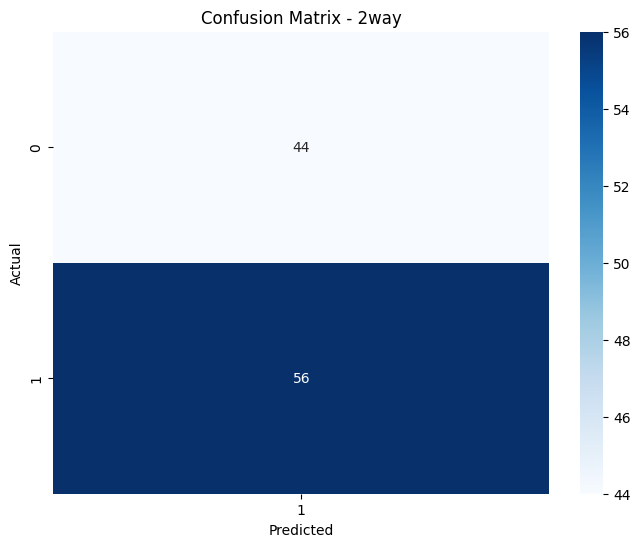


Running benchmark for 3way classification...
Loaded dataset for 3way classification


Processing samples:   0%|          | 0/55497 [00:00<?, ?it/s]Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Processing samples:   0%|          | 4/55497 [00:00<29:05, 31.80it/s]Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Processing samples:   0%|          | 8/55497 [00:00<29:08, 31.74it/s]Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Processing samples:   0%|          | 12/55497 [00:00<28:30, 32.43it/s]Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Processing samples:   0%|          | 16/55497 [00:00<28:10, 32.82it/s]Error in guard_interaction: 'context'
Error in guard_


Results for 3way classification:
Accuracy: 0.080
Blocking Rate: 1.000
False Block Rate: 0.560
Missed Blocks: 0.000
Average Confidence: 1.000

Confusion Matrix:
Predicted   1
Actual       
0          56
1           8
2          36


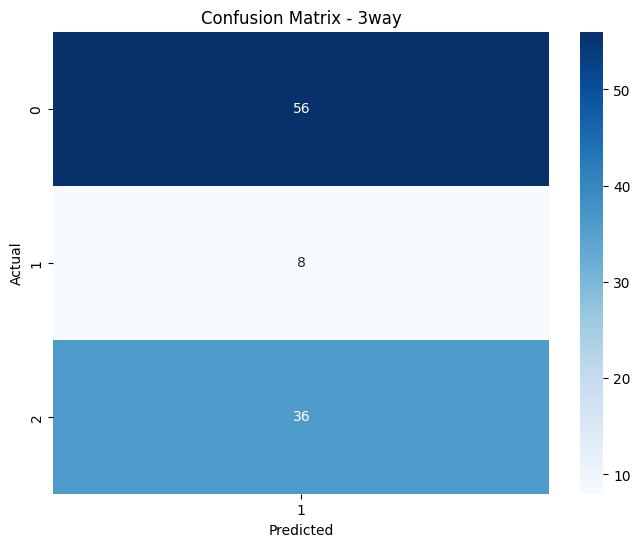


Running benchmark for 6way classification...
Loaded dataset for 6way classification


Processing samples:   0%|          | 0/55578 [00:00<?, ?it/s]Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Processing samples:   0%|          | 4/55578 [00:00<29:41, 31.19it/s]Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Processing samples:   0%|          | 8/55578 [00:00<28:20, 32.68it/s]Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Processing samples:   0%|          | 12/55578 [00:00<28:31, 32.46it/s]Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Error in guard_interaction: 'context'
Processing samples:   0%|          | 16/55578 [00:00<28:10, 32.87it/s]Error in guard_interaction: 'context'
Error in guard_


Results for 6way classification:
Accuracy: 0.040
Blocking Rate: 1.000
False Block Rate: 0.560
Missed Blocks: 0.000
Average Confidence: 1.000

Confusion Matrix:
Predicted   1
Actual       
0          56
1           4
2          27
3           3
5          10


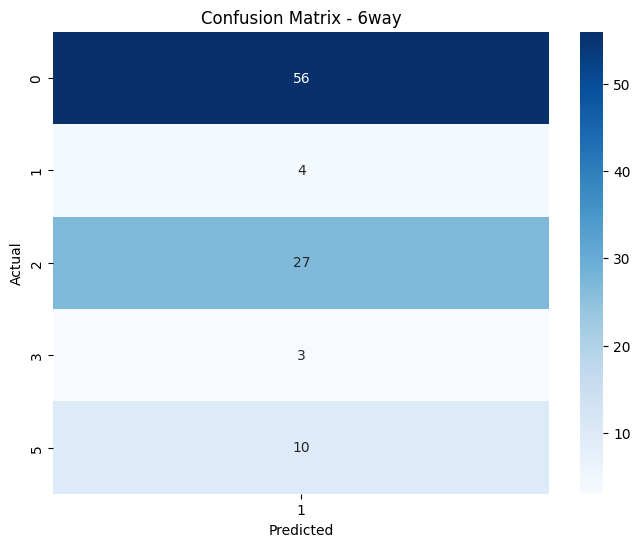


Results saved to C:\Users\CoolA\Code\M3Guard\m3guard\benchmark_results.json


In [1]:
# benchmark driver

import nest_asyncio
nest_asyncio.apply()

import asyncio
import json
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('C:/Users/CoolA/Code/M3Guard')

from m3guard.core.agent import M3GuardAgent
from m3guard.data.fakeddit_loader import FakedditBenchmark
from m3guard.plugins.content_safety.fake_news_guard import FakeNewsGuardPlugin

class FakedditGuardBenchmark:
    def __init__(self, sample_size=100):
        # Initialize paths
        self.base_path = Path(r"C:\Users\CoolA\Code\M3Guard\m3guard\Fakeddit dataset\Processed")
        self.dataset_paths = {
            "2way": self.base_path / "dataset_2way_output.txt",
            "3way": self.base_path / "dataset_3way_output.txt",
            "6way": self.base_path / "dataset_6way.txt"
        }
        self.sample_size = sample_size
        
        # Initialize M3Guard
        self.guard = M3GuardAgent()
        self.guard.plugin_manager.register_plugin(FakeNewsGuardPlugin())
        
    async def run_benchmark(self):
        """Run benchmarks for all classification types."""
        results = {}
        
        for label_type in ["2way", "3way", "6way"]:
            print(f"\nRunning benchmark for {label_type} classification...")
            
            # Load dataset
            dataset = FakedditBenchmark(label_type=label_type)
            
            # Keep the dataset object intact
            print(f"Loaded dataset for {label_type} classification")
            
            # Run evaluation with sample size limit
            results[label_type] = await self._evaluate_dataset(dataset)
            
            # Print results
            self._print_results(label_type, results[label_type])
            
            # Plot confusion matrix
            self._plot_confusion_matrix(
                results[label_type]['confusion_matrix'],
                label_type
            )
        
        return results
    
    async def _evaluate_dataset(self, dataset):
        """Evaluate M3Guard on a specific dataset with sample size limit."""
        results = {
            'predictions': [],
            'true_labels': [],
            'confidences': [],
            'blocked_attempts': 0,
            'allowed_attempts': 0,
            'false_positives': 0,
            'false_negatives': 0,
            'decisions': []
        }
        
        # Create a counter for processed samples
        processed_samples = 0
        
        for sample in tqdm(dataset, desc="Processing samples"):
            if processed_samples >= self.sample_size:
                break
                
            processed_samples += 1
            try:
                # Structure the input properly
                content = {
                    'text': sample.text,
                    'objects': sample.objects,
                    'type': 'multimodal',
                    'context': {
                        'source': 'fakeddit',
                        'timestamp': None,
                        'metadata': {}
                    }
                }
                
                # Get guardrail decision
                is_allowed, response = await self.guard.guard_interaction(
                    target_agent=None,
                    user_input=content
                )
                
                true_label = dataset.get_label(sample)
                results['predictions'].append(0 if is_allowed else 1)
                results['true_labels'].append(true_label)
                results['confidences'].append(response.get('confidence', 0))
                
                # Update counters
                if is_allowed:
                    results['allowed_attempts'] += 1
                    if true_label != 0:  # Not true content
                        results['false_negatives'] += 1
                else:
                    results['blocked_attempts'] += 1
                    if true_label == 0:  # True content
                        results['false_positives'] += 1
                
                results['decisions'].append({
                    'content': {
                        'text': sample.text,
                        'type': 'multimodal'
                    },
                    'decision': is_allowed,
                    'true_label': true_label,
                    'confidence': response.get('confidence', 0),
                    'reason': response.get('reason', ''),
                    'status': response.get('status', '')
                })
                
            except Exception as e:
                print(f"Error processing sample: {str(e)}")
                continue
        
        # Calculate metrics
        results.update(self._calculate_metrics(results))
        
        return results
    
    def _calculate_metrics(self, results):
        """Calculate benchmark metrics."""
        total = len(results['predictions'])
        if total == 0:
            return {
                'accuracy': 0,
                'blocking_rate': 0,
                'false_block_rate': 0,
                'missed_blocks': 0,
                'average_confidence': 0,
                'confusion_matrix': pd.DataFrame([[0, 0], [0, 0]])
            }
            
        true_labels = results['true_labels']
        pred_labels = results['predictions']
        
        return {
            'accuracy': sum(t == p for t, p in zip(true_labels, pred_labels)) / total,
            'blocking_rate': results['blocked_attempts'] / total,
            'false_block_rate': results['false_positives'] / total,
            'missed_blocks': results['false_negatives'] / total,
            'average_confidence': sum(results['confidences']) / total,
            'confusion_matrix': pd.crosstab(
                pd.Series(true_labels, name='Actual'),
                pd.Series(pred_labels, name='Predicted')
            )
        }
    
    def _print_results(self, classification_type, results):
        """Print benchmark results."""
        print(f"\nResults for {classification_type} classification:")
        print(f"Accuracy: {results['accuracy']:.3f}")
        print(f"Blocking Rate: {results['blocking_rate']:.3f}")
        print(f"False Block Rate: {results['false_block_rate']:.3f}")
        print(f"Missed Blocks: {results['missed_blocks']:.3f}")
        print(f"Average Confidence: {results['average_confidence']:.3f}")
        print("\nConfusion Matrix:")
        print(results['confusion_matrix'])
    
    def _plot_confusion_matrix(self, conf_matrix, classification_type):
        """Plot confusion matrix heatmap."""
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {classification_type}')
        plt.show()


# Run the benchmark with a small sample size initially
benchmark = FakedditGuardBenchmark(sample_size=100)  # Test with 100 samples
results = await benchmark.run_benchmark()

# Save results
output_path = Path(r"C:\Users\CoolA\Code\M3Guard\m3guard\benchmark_results.json")
with open(output_path, 'w') as f:
    # Convert DataFrame to dict for JSON serialization
    for class_type in results:
        results[class_type]['confusion_matrix'] = \
            results[class_type]['confusion_matrix'].to_dict()
    
    json.dump(results, f, indent=4)

print(f"\nResults saved to {output_path}")

In [2]:
def analyze_labels(file_path, num_records=200):
    label_counts = {0: 0, 1: 0}
    records_processed = 0
    
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if records_processed >= num_records:
                    break
                    
                # Find the [LABEL] marker and extract the label
                label_part = line.split('[LABEL]')
                if len(label_part) > 1:
                    # Extract the label and convert to int
                    try:
                        label = int(label_part[1].strip())
                        label_counts[label] += 1
                        records_processed += 1
                    except ValueError:
                        print(f"Warning: Invalid label format in record {records_processed + 1}")
                        continue
        
        # Calculate percentages
        total = sum(label_counts.values())
        if total > 0:
            percentages = {
                label: (count / total) * 100 
                for label, count in label_counts.items()
            }
            
            # Print results
            print(f"\nAnalysis of first {records_processed} records:")
            print(f"Label 0: {label_counts[0]} records ({percentages[0]:.2f}%)")
            print(f"Label 1: {label_counts[1]} records ({percentages[1]:.2f}%)")
        else:
            print("No valid records found")
            
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except Exception as e:
        print(f"Error: An unexpected error occurred: {e}")

# Use the function
file_path = r"C:\Users\CoolA\Code\M3Guard\m3guard\Fakeddit dataset\Processed\dataset_2way_output.txt"
analyze_labels(file_path)


Analysis of first 200 records:
Label 0: 89 records (44.50%)
Label 1: 111 records (55.50%)


In [3]:
def analyze_labels(file_path, num_records=200):
    label_counts = {0: 0, 1: 0, 2: 0}
    records_processed = 0
    
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if records_processed >= num_records:
                    break
                    
                # Find the [LABEL] marker and extract the label
                label_part = line.split('[LABEL]')
                if len(label_part) > 1:
                    # Extract the label and convert to int
                    try:
                        label = int(label_part[1].strip())
                        if label in label_counts:
                            label_counts[label] += 1
                            records_processed += 1
                        else:
                            print(f"Warning: Unexpected label value {label} in record {records_processed + 1}")
                    except ValueError:
                        print(f"Warning: Invalid label format in record {records_processed + 1}")
                        continue
        
        # Calculate percentages
        total = sum(label_counts.values())
        if total > 0:
            percentages = {
                label: (count / total) * 100 
                for label, count in label_counts.items()
            }
            
            # Print results
            print(f"\nAnalysis of first {records_processed} records:")
            print(f"Label 0: {label_counts[0]} records ({percentages[0]:.2f}%)")
            print(f"Label 1: {label_counts[1]} records ({percentages[1]:.2f}%)")
            print(f"Label 2: {label_counts[2]} records ({percentages[2]:.2f}%)")
        else:
            print("No valid records found")
            
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except Exception as e:
        print(f"Error: An unexpected error occurred: {e}")

# Use the function
file_path = r"C:\Users\CoolA\Code\M3Guard\m3guard\Fakeddit dataset\Processed\dataset_3way_output.txt"
analyze_labels(file_path)


Analysis of first 200 records:
Label 0: 111 records (55.50%)
Label 1: 14 records (7.00%)
Label 2: 75 records (37.50%)
